In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


BHK: Number of Bedrooms, Hall, Kitchen.

Rent: Price of the Houses/Apartments/Flats.

Size: Size of the Houses/Apartments/Flats in Square Feet.

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

Area Locality: Locality of the Houses/Apartments/Flats.

City: City where the Houses/Apartments/Flats are Located.

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

Bathroom: Number of Bathrooms.

Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

### 1.Read the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


1.In this Dataset, we have information on almost 4700+ Houses/Apartments/Flats 
Available for Rent with different parameters like BHK, Rent, Size, No. of Floors, Area Type, Area Locality, City, Furnishing Status, Type of Tenant Preferred, No. of Bathrooms, Point of Contact.
The above dataset contains 4746 rows and 12 columns overall.                      
2.Majority columns have object as datatype.

In [ ]:
df.shape

(4746, 12)

In [ ]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


*   The Given data consists of 4746 observations.
*   The Average value for BHK column is concentrated at 2, For Rent Column it is 3.49,for Size column it is 967 & for Bathroom column it is 1.96
*   The max and min values for BHK,Size & Bathroom shows the presence of outliers in them. Varience within the column is more.
*   By looking at the data it is observed that it is has positive skewness.
*   Again dataset has high complexity so there are chances of **overfitting scenario.**

### 2.EDA

### 2.1. Missing Value Handling

In [ ]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

Here no missing values are present in dataset.

In [ ]:
df.rename(columns={'Area Type':'Area_Type','Area Locality':'Area_Locality',
                   'Furnishing Status':'Furnishing_Status',
                   'Tenant Preferred':'Tenant_Preferred',
                   'Point of Contact':'Point_of_Contact'},inplace=True)

In [ ]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area_Type,Area_Locality,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point_of_Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


### 2.2 Encoding

## Goal Identification
1.Now Here our **target Variable is rent** i.e we need to predict the rent on the basis of the BHK,City,Furnishing Status.                                
2.So as per ML Architecture Feature(X) and Response(Y) should be Seperated and should be numeric in nature.                                                     
3.Then we will Encode the City,Furnishing Status columns and then we will split them into features(X) & Response(Y)

In [ ]:
x=df.iloc[:,[1,7,8]]
y=df.iloc[:,2]

In [ ]:
x

,BHK,City,Furnishing_Status
0,2,Kolkata,Unfurnished
1,2,Kolkata,Semi-Furnished
2,2,Kolkata,Semi-Furnished
3,2,Kolkata,Unfurnished
4,2,Kolkata,Unfurnished
...,...,...,...
4741,2,Hyderabad,Semi-Furnished
4742,3,Hyderabad,Semi-Furnished
4743,3,Hyderabad,Semi-Furnished
4744,3,Hyderabad,Semi-Furnished


In [ ]:
y

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64

In [ ]:
catcol=x.select_dtypes(object).columns
catcol

Index(['City', 'Furnishing_Status'], dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
x[catcol]=oe.fit_transform(x[catcol])

In [ ]:
x

,BHK,City,Furnishing_Status
0,2,4.0,2.0
1,2,4.0,1.0
2,2,4.0,1.0
3,2,4.0,2.0
4,2,4.0,2.0
...,...,...,...
4741,2,3.0,1.0
4742,3,3.0,1.0
4743,3,3.0,1.0
4744,3,3.0,1.0


### 2.3 Data Analysis

In [ ]:
x.corr()

,BHK,City,Furnishing_Status
BHK,1.000000,0.046914,-0.140264
City,0.046914,1.000000,0.002633
Furnishing_Status,-0.140264,0.002633,1.000000


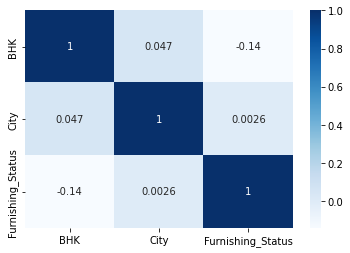

In [ ]:
sns.heatmap(x.corr(),cmap="Blues",annot=True)

In [ ]:
x["BHK"].value_counts()

2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: BHK, dtype: int64

In [ ]:
df["City"].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

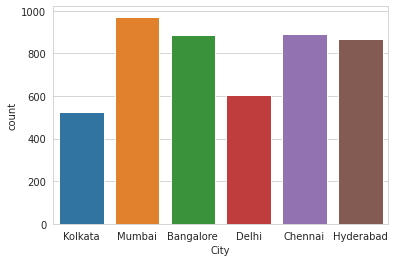

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x="City",data=df)

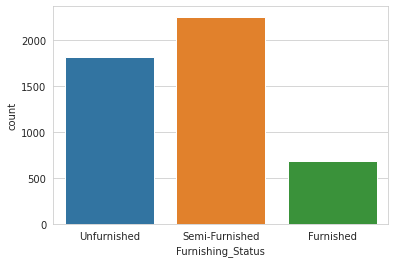

In [ ]:
sns.countplot(x="Furnishing_Status",data=df)

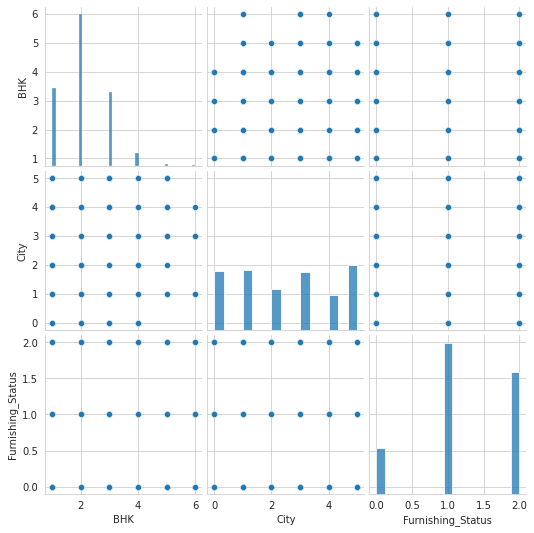

In [ ]:
sns.pairplot(x)

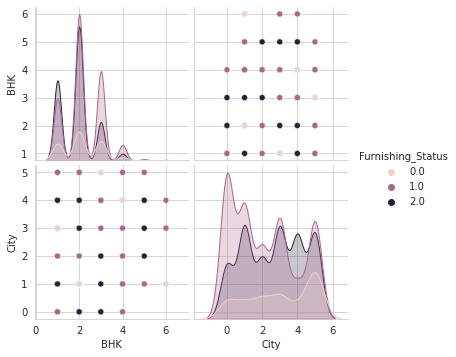

In [ ]:
sns.pairplot(x,hue="Furnishing_Status")

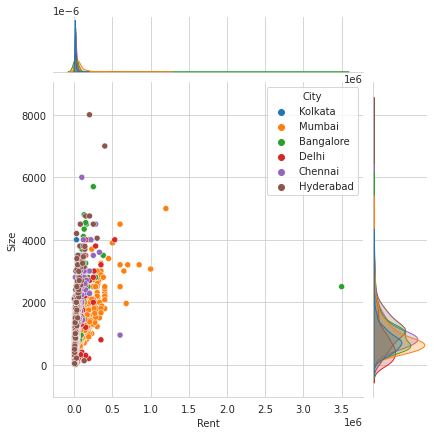

In [ ]:
sns.jointplot(data=df, x="Rent", y="Size", hue="City")

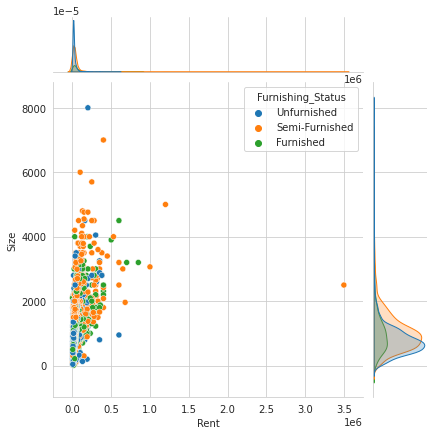

In [ ]:
sns.jointplot(data=df,x="Rent",y="Size",hue="Furnishing_Status")

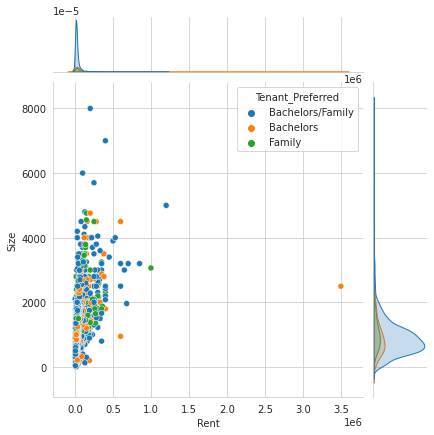

In [ ]:
sns.jointplot(data=df,x="Rent",y="Size",hue="Tenant_Preferred")

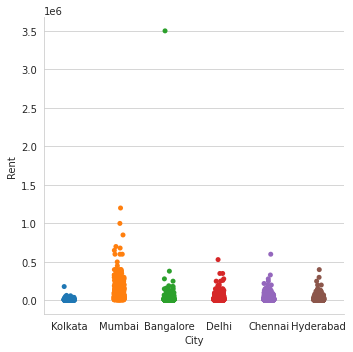

In [ ]:
sns.catplot(x="City", y="Rent", data=df)

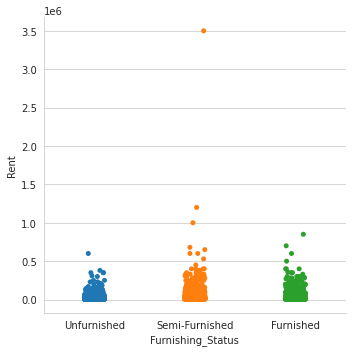

In [ ]:
sns.catplot(x="Furnishing_Status", y="Rent", data=df)

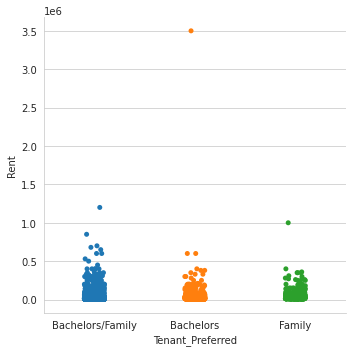

In [ ]:
sns.catplot(x="Tenant_Preferred", y="Rent", data=df)

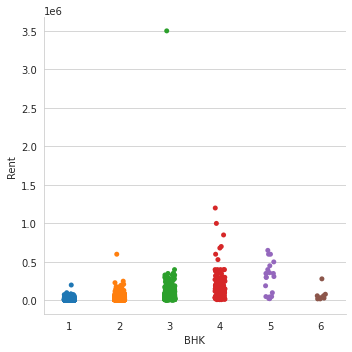

In [ ]:
sns.catplot(x="BHK", y="Rent", data=df)

### From Data Analysis it is concluded that:
*   Mumbai has the maximum Renting rate as compared to other cities.
*   Majority of 2BHK flats are avilable for rent.
*   Semi-Furnished flats are more for Renting
*   BHK and Bathroom have good corelation which is but obvious
*   The preference of Tenant preferred for Bachelors/Family(combined) is more.
*   Mumbai has high Rent than other cities.


### 3.Base Line Model Creation

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
knn=KNeighborsRegressor()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
ac=r2_score(ytest,ypred)
train=knn.score(xtrain,ytrain)
test=knn.score(xtest,ytest)
print(f"MAE:{mae}\nMSE:{mse}\nRMSE:{rmse}\nAccuracy:{ac}\n\n")
print(f"Training Accuracy:{train}\nTesting Accuracy:{test}")

MAE:20214.042415730335
MSE:10161645589.674212
RMSE:100804.98792060942
Accuracy:0.17471692433893804


Training Accuracy:0.5429839634620586
Testing Accuracy:0.17471692433893804


It has Low Bais & High Varience i.e overfitting which is as per the prediction from EDA since it has high features(complexity).
Model has trained on noise instead of signal.

### 5.Skewness,outlier Removal &  Check for Scaling 

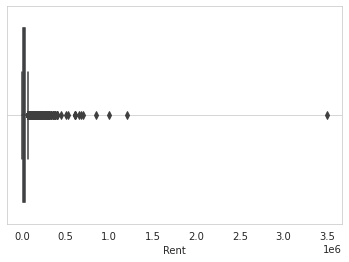

In [ ]:
sns.boxplot(data=x,x=y)    
plt.grid()
plt.show()

So as we can see there is outlier in the our target variable so we need to remove it.

In [ ]:
y[(y>2.00000e+06)]	# We have filtered out the index position of outlier by using masking the outlier is present at 1837 index postition

1837    3500000
Name: Rent, dtype: int64

In [ ]:
y.drop(1837,axis=0,inplace=True)

In [ ]:
y.shape

(4745,)

In [ ]:
x.shape

(4746, 3)

Here the shape of both features(x) & target(y) should be same.

In [ ]:
x.drop(1837,axis=0,inplace=True)
x.shape

(4745, 3)

Now Both X & Y have same dimensions and we have removed the outliers.

Now we need to remove skewness if any.

We will check skewness first.  
                                             using np.log method                                                            Here the columns BHK have skewness of 0.59 .                     The corelation of both columns with target is 0.37  which is not good so we need to remove the skewness from these column. Since it is catergorical column we will not remove the skewness.

In [ ]:
colname=x.select_dtypes("int64").columns
colname

Index(['BHK'], dtype='object')

BHK
0.5996076576594834


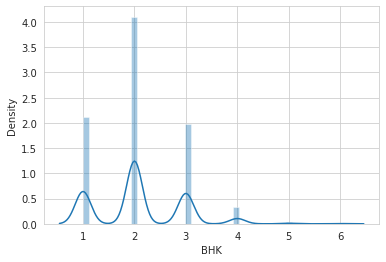

In [ ]:
from scipy.stats import skew
for col in x[colname]:
  print(col)
  print(skew(x[col]))

  plt.figure()
  sns.distplot(x[col])
  plt.show()

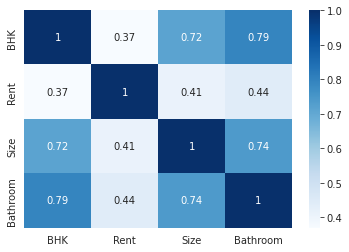

In [ ]:
sns.heatmap(df.corr(),cmap="Blues",annot=True)

The column BHK have skewness of 0.59. 

The corelation BHK column with target(Rent) is 0.37  which is not good so we need to remove the skewness from BHK columns using np.log method.


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
knn=KNeighborsRegressor()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
ac=r2_score(ytest,ypred)
train=knn.score(xtrain,ytrain)
test=knn.score(xtest,ytest)
print(f"MAE:{mae}\nMSE:{mse}\nRMSE:{rmse}\nAccuracy:{ac}\n\n")
print(f"Training Accuracy:{train}\nTesting Accuracy:{test}")

MAE:17749.419101123596
MSE:1500160025.9082024
RMSE:38731.89933256827
Accuracy:0.5903936876164048


Training Accuracy:0.5456966024753314
Testing Accuracy:0.5903936876164048


The model is performing much better than base line model.
but the efficiency & is not that great,so we can do Hyperparameter Tunning on this model. It also has Underfitting with High bais & Low Variance.

In [ ]:
neighbors=np.arange(1,20,2)
trainac=[]
testac=[]
for i in neighbors:
  knn=KNeighborsRegressor(n_neighbors=i)
  knn.fit(xtrain,ytrain)
  train=knn.score(xtrain,ytrain)
  test=knn.score(xtest,ytest)
  trainac.append(train)
  testac.append(test)

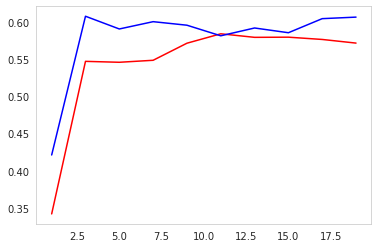

In [ ]:
plt.plot(neighbors,trainac,color="red")
plt.plot(neighbors,testac,color="blue")
plt.grid()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
knn=KNeighborsRegressor(n_neighbors=11)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
ac=r2_score(ytest,ypred)
train=knn.score(xtrain,ytrain)
test=knn.score(xtest,ytest)
print(f"MAE:{mae}\nMSE:{mse}\nRMSE:{rmse}\nAccuracy:{ac}\n\n")
print(f"Training Accuracy:{train}\nTesting Accuracy:{test}")

MAE:16840.748595505618
MSE:1533703570.9739993
RMSE:39162.52763770489
Accuracy:0.5812348995128782


Training Accuracy:0.5839192567524558
Testing Accuracy:0.5812348995128782


So we have created the best fit model with low bais and low variance.

Forecasting New Observation

In [ ]:
x.head()

,BHK,City,Furnishing_Status
0,2,4.0,2.0
1,2,4.0,1.0
2,2,4.0,1.0
3,2,4.0,2.0
4,2,4.0,2.0


In [ ]:
oe.categories_

[array(['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'],
       dtype=object),
 array(['Furnished', 'Semi-Furnished', 'Unfurnished'], dtype=object)]

In [ ]:
BHK=2
City="Kolkata"
Furnishing_Status="Unfurnished"


newx=[BHK,City,Furnishing_Status]

In [ ]:
newx[1],newx[-1]= oe.transform([[newx[1],newx[-1]]])[0]
newx

[2, 4.0, 2.0]

In [ ]:
knn.predict([newx])[0]

24563.636363636364

In [ ]:
def rentprediction():
  BHK=int(input("Enter BHK:"))
  City=input("Enter City:")
  Furnishing_Status=input("Enter Furnishing Status:")
  newx=[BHK,City,Furnishing_Status]
  newx[1],newx[-1]= oe.transform([[newx[1],newx[-1]]])[0]
  predicted_rent=knn.predict([newx])[0]
  print(f"The predicted Rent is:{predicted_rent:.2f}Rupees")
  


### 10.Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

knn_cv = KNeighborsRegressor(n_neighbors=11)
cv_scores = cross_val_score(knn_cv, x, y, cv=5)
print(cv_scores)

[0.33738439 0.58933065 0.27328354 0.24636954 0.30456907]


In [ ]:
np.mean(cv_scores)

0.3501874393039153

In [ ]:
cv_scores.std()

0.12339108358033425

In [ ]:
def mymodel(model):
  model.fit(xtrain,ytrain)
  ypred=model.predict(xtest)
  train=model.score(xtrain,ytrain)
  test=model.score(xtest,ytest)
  print(f"Training Accuracy:{train}\nTesting Accuracy:{test}")
  return model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
mymodel(DecisionTreeRegressor())

Training Accuracy:0.6107978537365988
Testing Accuracy:0.6254865653923594


DecisionTreeRegressor()

### Using Random Forest

In [ ]:
from sklearn.ensemble import BaggingRegressor
bg=mymodel(BaggingRegressor(DecisionTreeRegressor()))

Training Accuracy:0.6059373702763946
Testing Accuracy:0.6232456388441197


Conclusion:
The KNeighborsRegressor with n_neighbors=11 & Random Forest gives the best fit model with low bais and low varience.
The Accuracy of Model is 60% for both the model.

Future scope:
We can use same dataset for classification problem with City as a target. 